In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set some display options for better viewing
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# --- Load the Data ---
file_path = 'subset_pap.csv'
df = pd.read_csv(file_path)

# --- Initial Inspection ---
print("1. DATASET SHAPE (ROWS, COLUMNS):")
print(df.shape)
print("\n" + "="*50 + "\n")

print("2. COLUMN NAMES:")
# Using a loop to print one column per line makes it easier to read
for col in df.columns.tolist():
    print(col)
print("\n" + "="*50 + "\n")

print("3. DATA TYPES AND NULL VALUES:")
df.info(verbose=True, show_counts=True)
print("\n" + "="*50 + "\n")

print("4. FIRST 5 ROWS PREVIEW:")
print(df.head())

1. DATASET SHAPE (ROWS, COLUMNS):
(130668, 20)


2. COLUMN NAMES:
entidadFederativa
delegacionMunicipio
codigoPostal
colonia
calle
tipoBien
segmentoVivienda
estadoConservacion
superficieTerrenoM2
superficieConstruccionM2
numeroPisos
recamaras
banios
espaciosEstacionamiento
unidadesRentables
valorComercial
m2Comercial
edad
latitud
longitud


3. DATA TYPES AND NULL VALUES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130668 entries, 0 to 130667
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   entidadFederativa         130668 non-null  object 
 1   delegacionMunicipio       130661 non-null  object 
 2   codigoPostal              130662 non-null  float64
 3   colonia                   130663 non-null  object 
 4   calle                     130662 non-null  object 
 5   tipoBien                  130668 non-null  object 
 6   segmentoVivienda          129776 non-null  object 
 7   estado

In [5]:
print(df['estadoConservacion'].unique())

['BUENO' 'NUEVO' 'RECIENTEMENTE REMODELADO' 'MUY BUENO' 'NO APLICA'
 'REGULAR' 'MALO' 'RUINOSO' nan]


In [9]:
print(df['valorComercial'])

0         5787000.0
1         6380000.0
2         7760100.0
3         7431000.0
4         5152000.0
            ...    
130663     695000.0
130664     381000.0
130665     581000.0
130666     662000.0
130667     316000.0
Name: valorComercial, Length: 130668, dtype: float64


--- Analysis of Target Variable: valorComercial ---

1. DESCRIPTIVE STATISTICS:
count    1.306530e+05
mean     2.219832e+06
std      3.575647e+06
min      6.700000e+04
25%      6.020000e+05
50%      1.352000e+06
75%      2.585000e+06
max      2.823920e+08
Name: valorComercial, dtype: float64




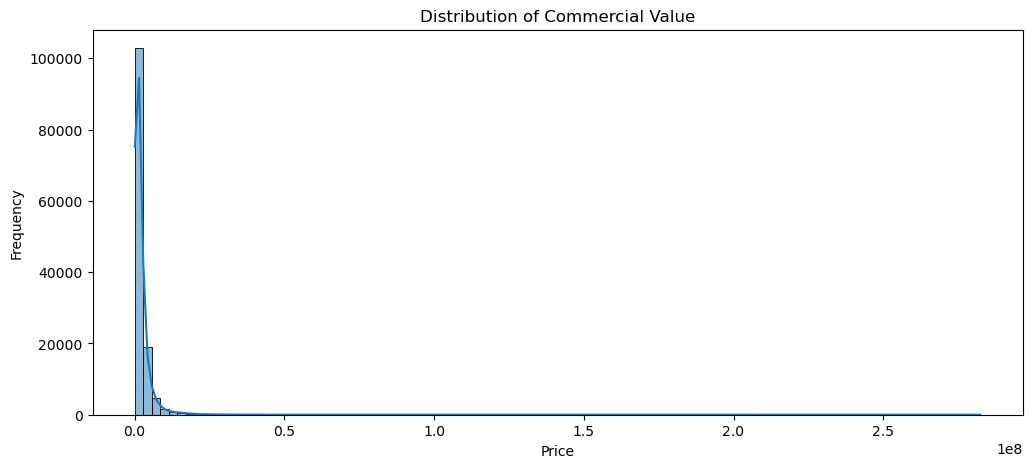

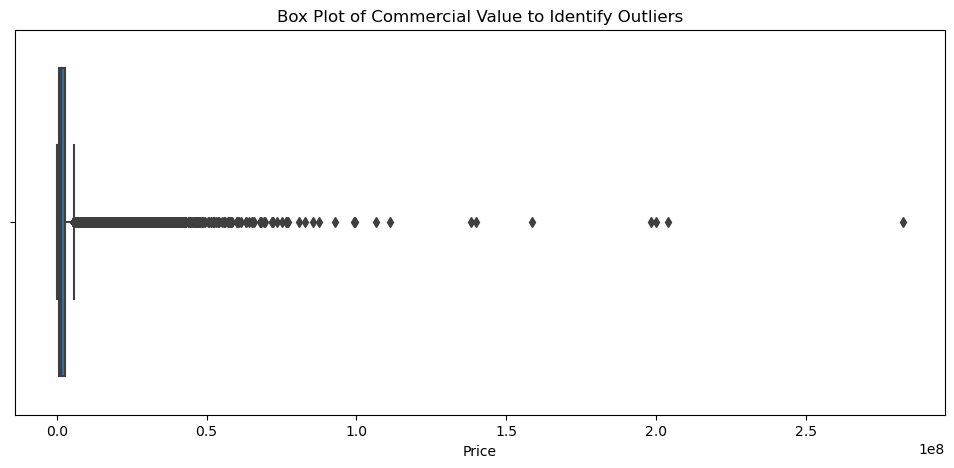

In [8]:
# --- Analyze the Target Variable ---
target_col = 'valorComercial'

print(f"--- Analysis of Target Variable: {target_col} ---\n")

print("1. DESCRIPTIVE STATISTICS:")
print(df[target_col].describe())
print("\n" + "="*50 + "\n")

# 2. VISUALIZE THE DISTRIBUTION
plt.figure(figsize=(12, 5))
sns.histplot(df[target_col], bins=100, kde=True)
plt.title('Distribution of Commercial Value')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 3. VISUALIZE OUTLIERS
plt.figure(figsize=(12, 5))
sns.boxplot(x=df[target_col])
plt.title('Box Plot of Commercial Value to Identify Outliers')
plt.xlabel('Price')
plt.show()

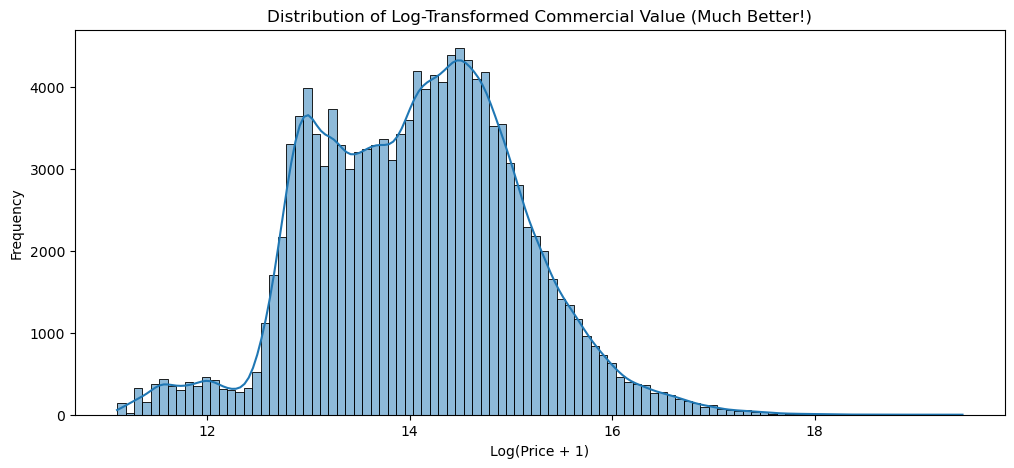

In [12]:
# --- Step 3.5: Apply Log Transformation to the Target Variable ---

# We use np.log1p which is log(1+x) to handle potential zero values safely
df['valorComercial_log'] = np.log1p(df['valorComercial'])

# Now, let's plot the new, transformed variable
plt.figure(figsize=(12, 5))
sns.histplot(df['valorComercial_log'], bins=100, kde=True)
plt.title('Distribution of Log-Transformed Commercial Value (Much Better!)')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.show()

--- Analysis of Numeric Features ---

DESCRIPTIVE STATISTICS FOR ALL NUMERIC COLUMNS:
        codigoPostal  superficieTerrenoM2  superficieConstruccionM2    numeroPisos      recamaras         banios  espaciosEstacionamiento  unidadesRentables  valorComercial   m2Comercial           edad        latitud       longitud
count  130662.000000         1.289890e+05             130665.000000  130334.000000  130316.000000  130320.000000            130328.000000      130424.000000    1.306530e+05  1.305850e+05  130545.000000  130647.000000  130647.000000
mean    52031.944460         1.434541e+03                107.357995       1.614644       2.496908       1.779481                 1.395955           1.047246    2.219832e+06  1.754842e+04       7.288069      21.855642    -100.685245
std     27745.742062         8.870519e+03                125.378681       0.936902       0.827035       1.000866                 0.828005           2.097632    3.575647e+06  1.502225e+04      24.443884       3.678595  

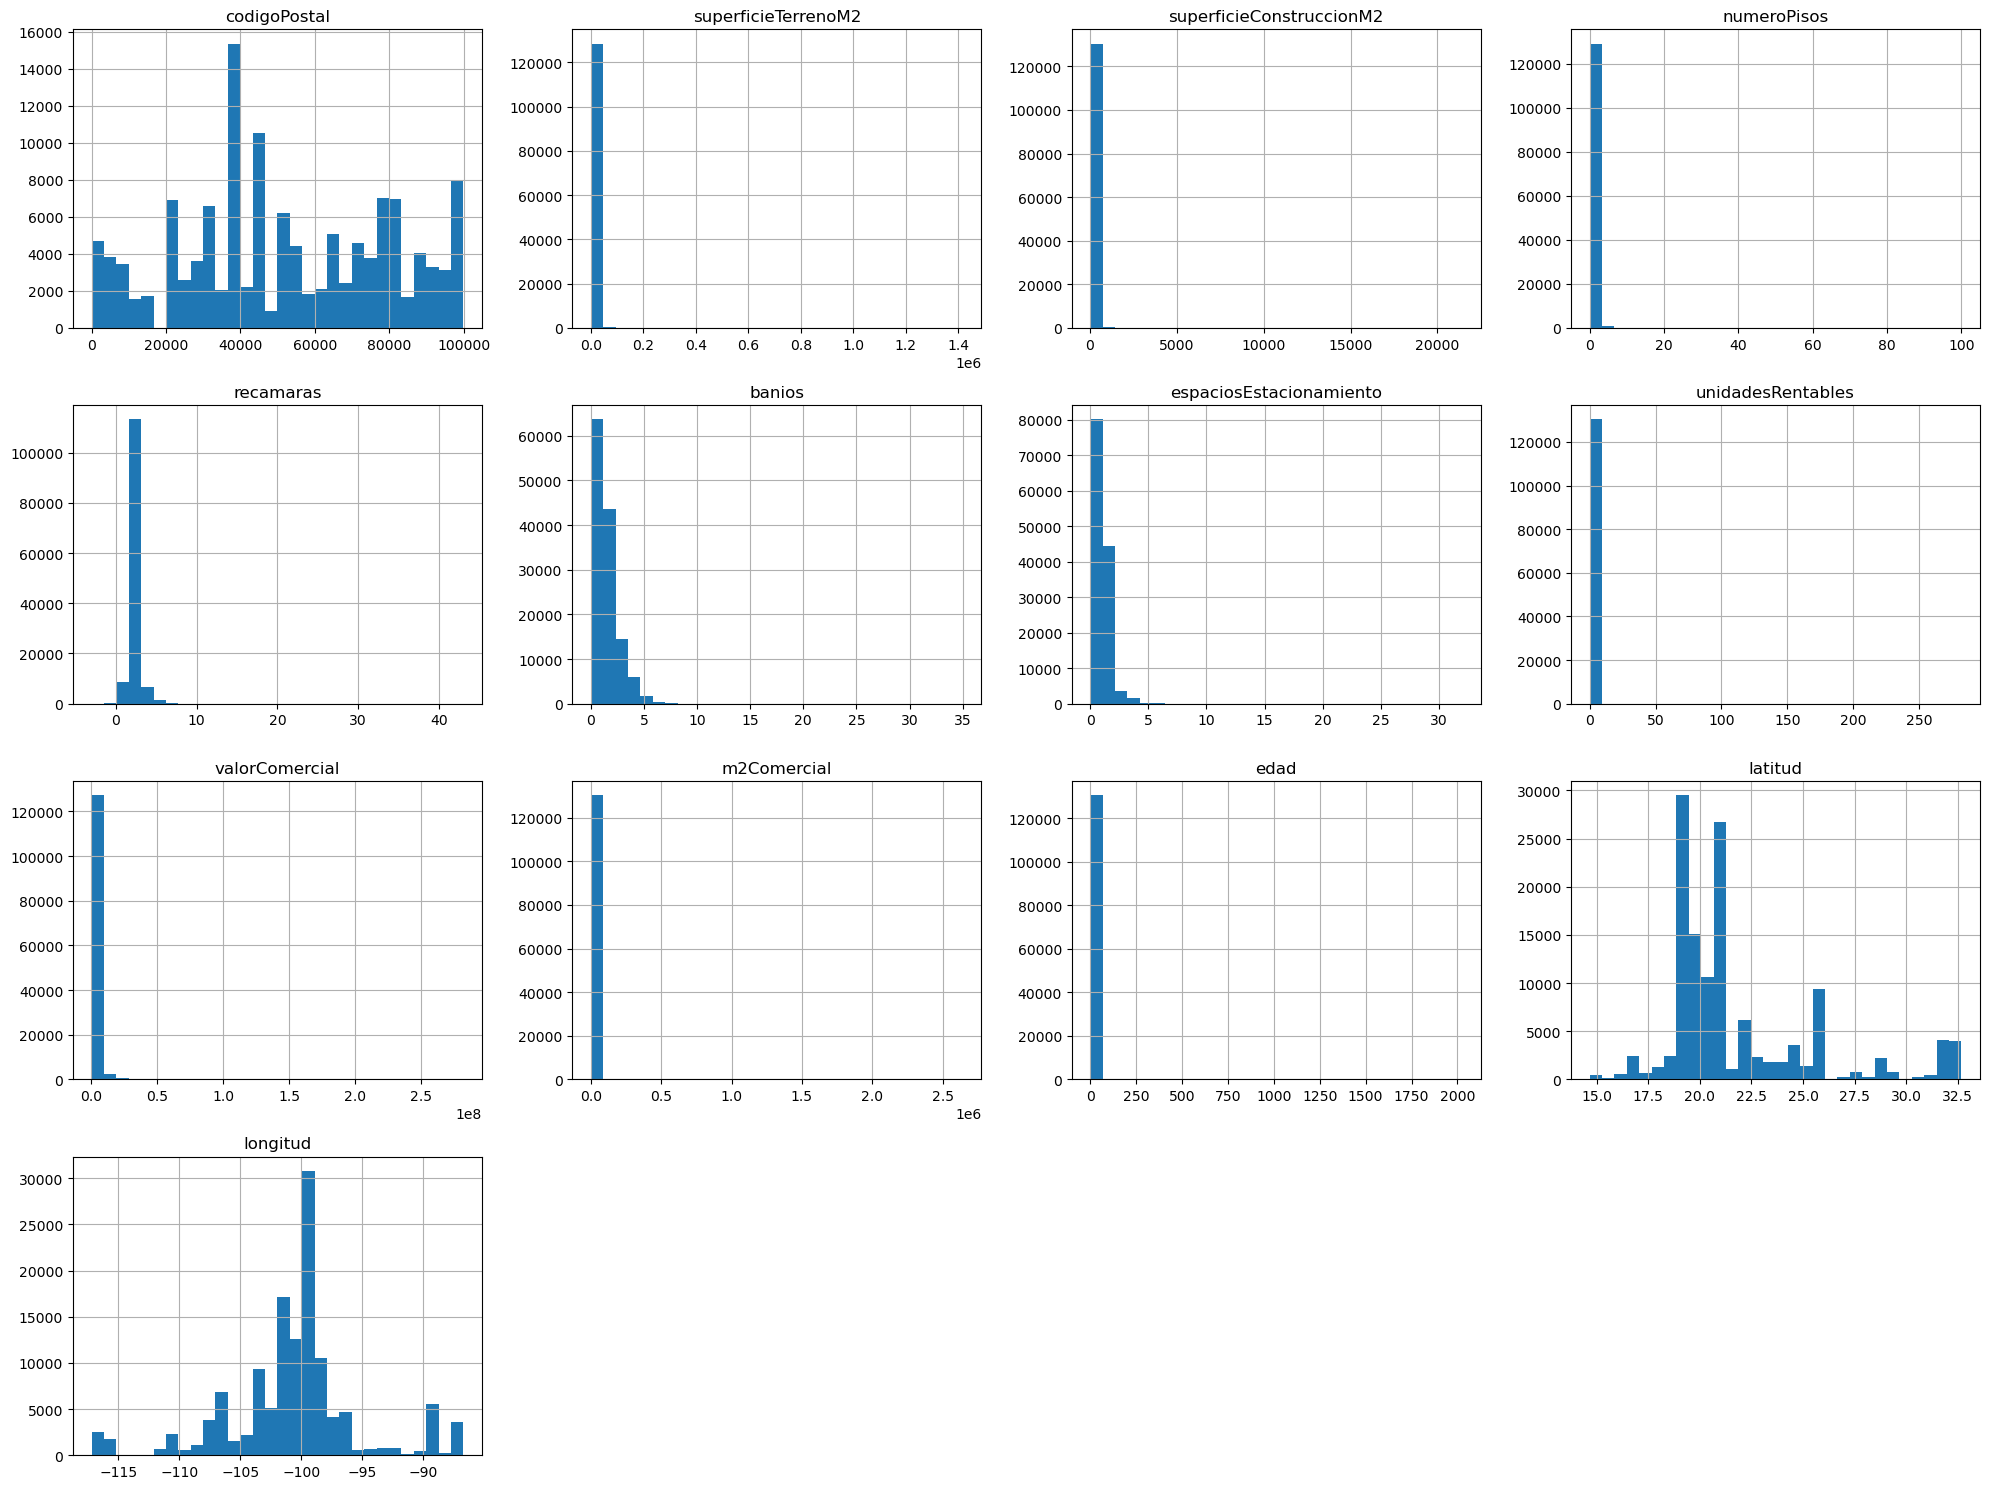

TOP 15 FEATURES MOST CORRELATED WITH VALORCOMERCIAL:
valorComercial              1.000000
superficieConstruccionM2    0.656458
banios                      0.588306
espaciosEstacionamiento     0.501258
m2Comercial                 0.447087
recamaras                   0.320752
numeroPisos                 0.189326
codigoPostal                0.116196
latitud                     0.077013
superficieTerrenoM2         0.063656
longitud                    0.037184
edad                        0.035429
unidadesRentables           0.010657
Name: valorComercial, dtype: float64


In [10]:
# --- Analyze Numeric Features ---
numeric_df = df.select_dtypes(include=np.number)

print("--- Analysis of Numeric Features ---\n")
print("DESCRIPTIVE STATISTICS FOR ALL NUMERIC COLUMNS:")
print(numeric_df.describe())
print("\n" + "="*50 + "\n")

# Plot histograms for all numeric columns to see their distributions
numeric_df.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

# CORRELATION with the target variable
# This is more useful than a giant heatmap when you have many columns.
print("TOP 15 FEATURES MOST CORRELATED WITH VALORCOMERCIAL:")
correlation_matrix = numeric_df.corr()
print(correlation_matrix[target_col].abs().sort_values(ascending=False).head(15))

In [13]:
# --- Analyze Categorical Features ---
# --- Step 4.B: Analyze Categorical Features ---
categorical_features = ['entidadFederativa', 'delegacionMunicipio', 'colonia', 'calle', 'tipoBien', 'segmentoVivienda', 'estadoConservacion']
categorical_df = df[categorical_features].astype('category')

print("--- Analysis of Categorical Features ---\n")
print("NUMBER OF UNIQUE CATEGORIES PER COLUMN:")
print(categorical_df.nunique())
print("\n" + "="*50 + "\n")

# Let's inspect the most important ones
important_cat_cols = ['delegacionMunicipio', 'colonia', 'tipoBien']

for col in important_cat_cols:
    print(f"--- Top 10 Categories for: {col} ---")
    print(df[col].value_counts().head(10))
    print("-" * 30)

--- Analysis of Categorical Features ---

NUMBER OF UNIQUE CATEGORIES PER COLUMN:
entidadFederativa         33
delegacionMunicipio      844
colonia                33407
calle                  45058
tipoBien                   4
segmentoVivienda           2
estadoConservacion         8
dtype: int64


--- Top 10 Categories for: delegacionMunicipio ---
LEON             12927
BENITO JUAREZ     4655
JUAREZ            3891
MERIDA            3765
CULIACAN          3306
ZAPOPAN           3021
ZEMPOALA          2341
TIJUANA           2012
CUAUHTEMOC        1945
GUADALUPE         1907
Name: delegacionMunicipio, dtype: int64
------------------------------
--- Top 10 Categories for: colonia ---
PUNTA DORADA                                         928
LOMA DORADA                                          764
CENTRO                                               727
CAUCEL II                                            570
LOS HEROES LEON SECCION 6 HEROES DEL BICENTENARIO    510
LA TOSCANA              

--- Geospatial Analysis ---


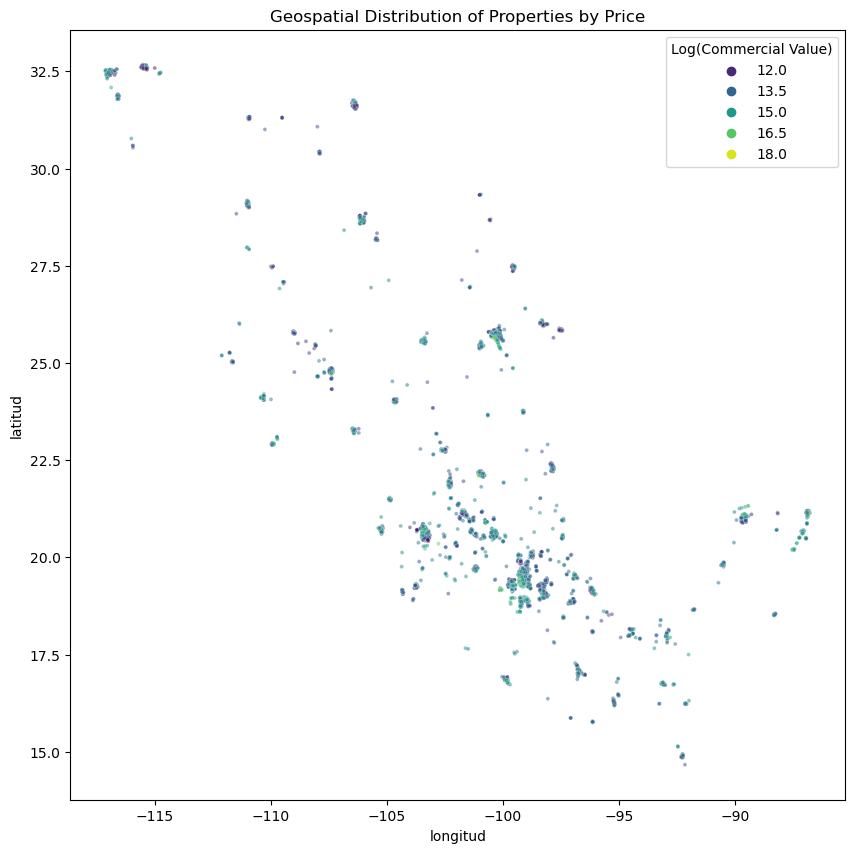

In [14]:
# --- Step 4.C: Analyze Geospatial Features ---
lat_col = 'latitud'
lon_col = 'longitud'

if lat_col in df.columns and lon_col in df.columns:
    print("--- Geospatial Analysis ---")
    plt.figure(figsize=(10, 10))
    sns.scatterplot(
        # Use a sample for performance, as 100k points can be slow to plot
        data=df.sample(10000, random_state=42), 
        x=lon_col,
        y=lat_col,
        hue='valorComercial_log', # We use the log version for better color contrast
        palette='viridis',
        alpha=0.5,
        s=8 
    )
    plt.title('Geospatial Distribution of Properties by Price')
    plt.legend(title='Log(Commercial Value)')
    plt.show()